## Imports

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [10]:
df=pd.read_csv('cardekho_dataset.csv')
df.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [11]:
print(df.fuel_type.unique())
print(df.seller_type.unique())
print(df.transmission_type.unique())
print()

['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']



## Data PreProcessing

### Dropping Unused and Redundant columns

In [12]:
df = df.drop(columns=['Unnamed: 0','car_name','brand'])
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


### Label Encoding for Categorical Data

In [13]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['model', 'seller_type', 'fuel_type', 'transmission_type']

# Apply label encoding to each of the categorical columns
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Check the updated DataFrame with encoded columns
print(df.head())

   model  vehicle_age  km_driven  seller_type  fuel_type  transmission_type  \
0      7            9     120000            1          4                  1   
1     54            5      20000            1          4                  1   
2    118           11      60000            1          4                  1   
3      7            9      37000            1          4                  1   
4     38            6      30000            0          1                  1   

   mileage  engine  max_power  seats  selling_price  
0    19.70     796      46.30      5         120000  
1    18.90    1197      82.00      5         550000  
2    17.00    1197      80.00      5         215000  
3    20.92     998      67.10      5         226000  
4    22.77    1498      98.59      5         570000  


### Data Scaling for MLR

In [14]:
scaler = StandardScaler()
data=df
numeric_columns=['km_driven' , 'max_power']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
data.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,7,9,1.247335,1,4,1,19.70,796,-1.263352,5,120000
1,54,5,-0.690016,1,4,1,18.90,1197,-0.432571,5,550000
2,118,11,0.084924,1,4,1,17.00,1197,-0.479113,5,215000
3,7,9,-0.360667,1,4,1,20.92,998,-0.779312,5,226000
4,38,6,-0.496281,0,1,1,22.77,1498,-0.046502,5,570000


## Data Visualization

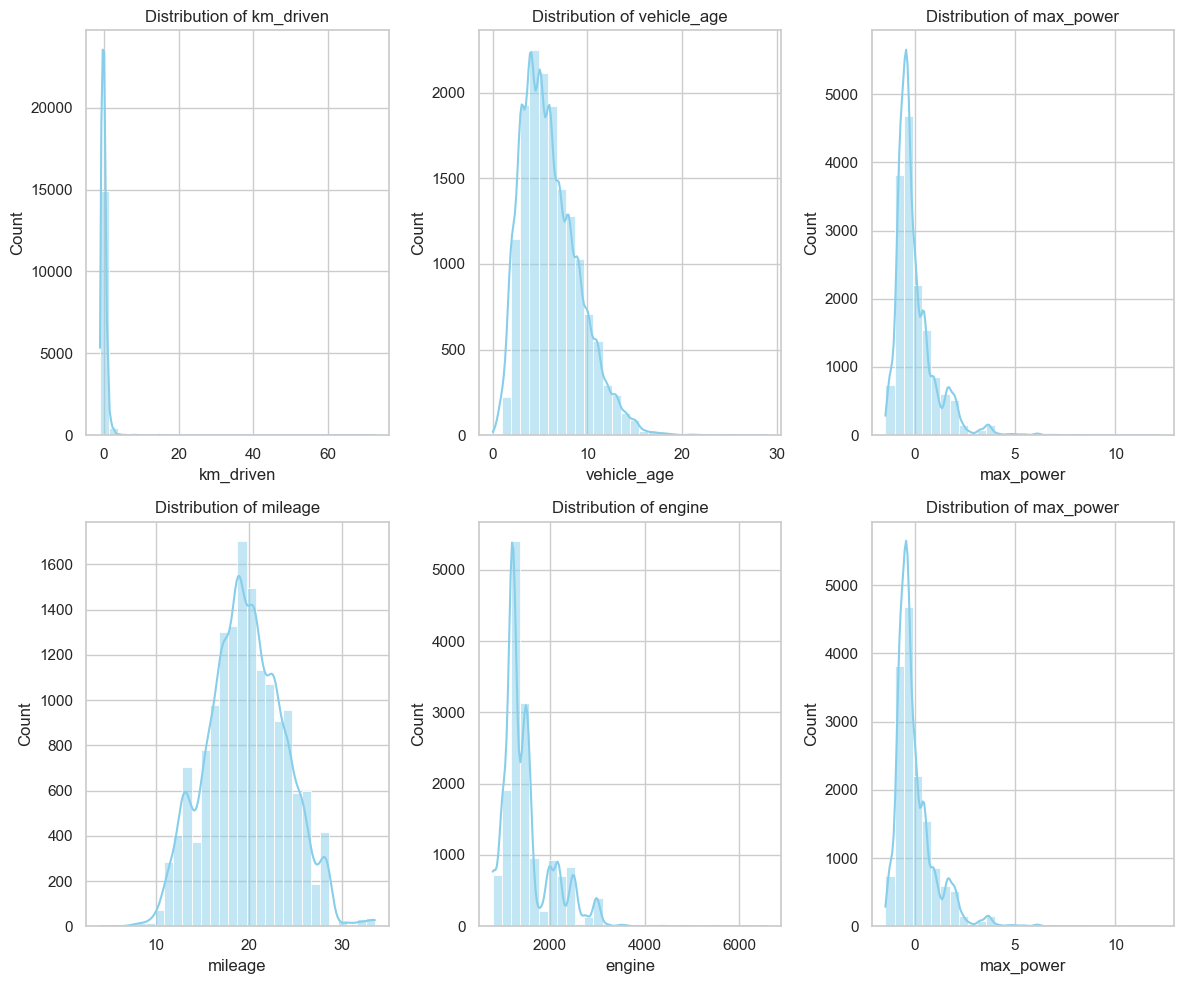

In [15]:
numeric_columns=['km_driven' , 'vehicle_age' , 'max_power', 'mileage','engine','max_power']

sns.set(style="whitegrid")

plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

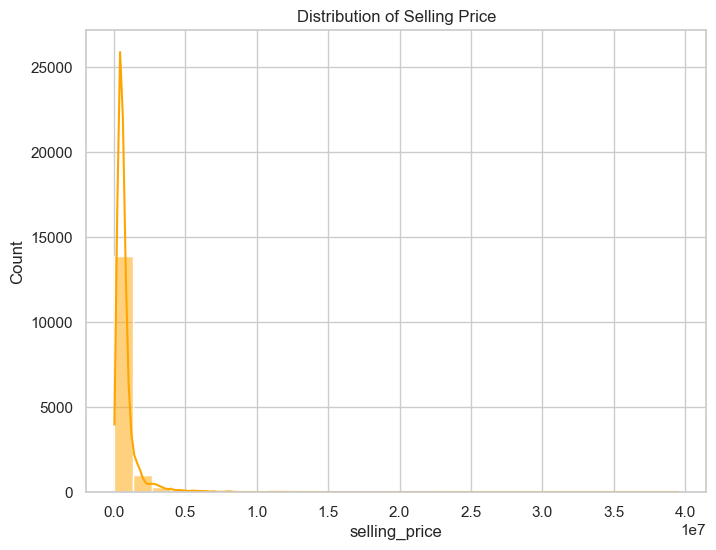

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(df['selling_price'], kde=True, color='orange', bins=30)
plt.title('Distribution of Selling Price')
plt.show()

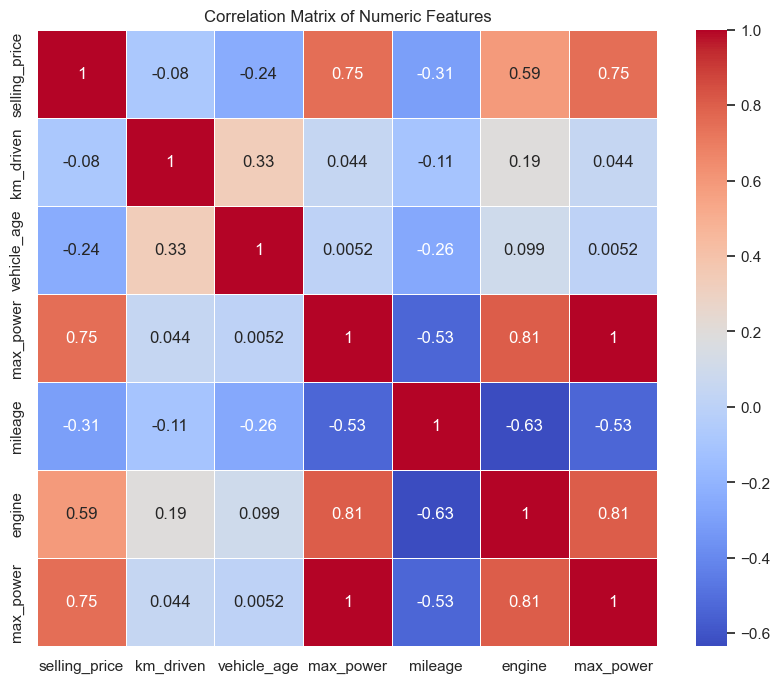

In [17]:
numeric_columns=['selling_price', 'km_driven' , 'vehicle_age' , 'max_power', 'mileage','engine','max_power']



plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr()  # Calculate correlation between numeric columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

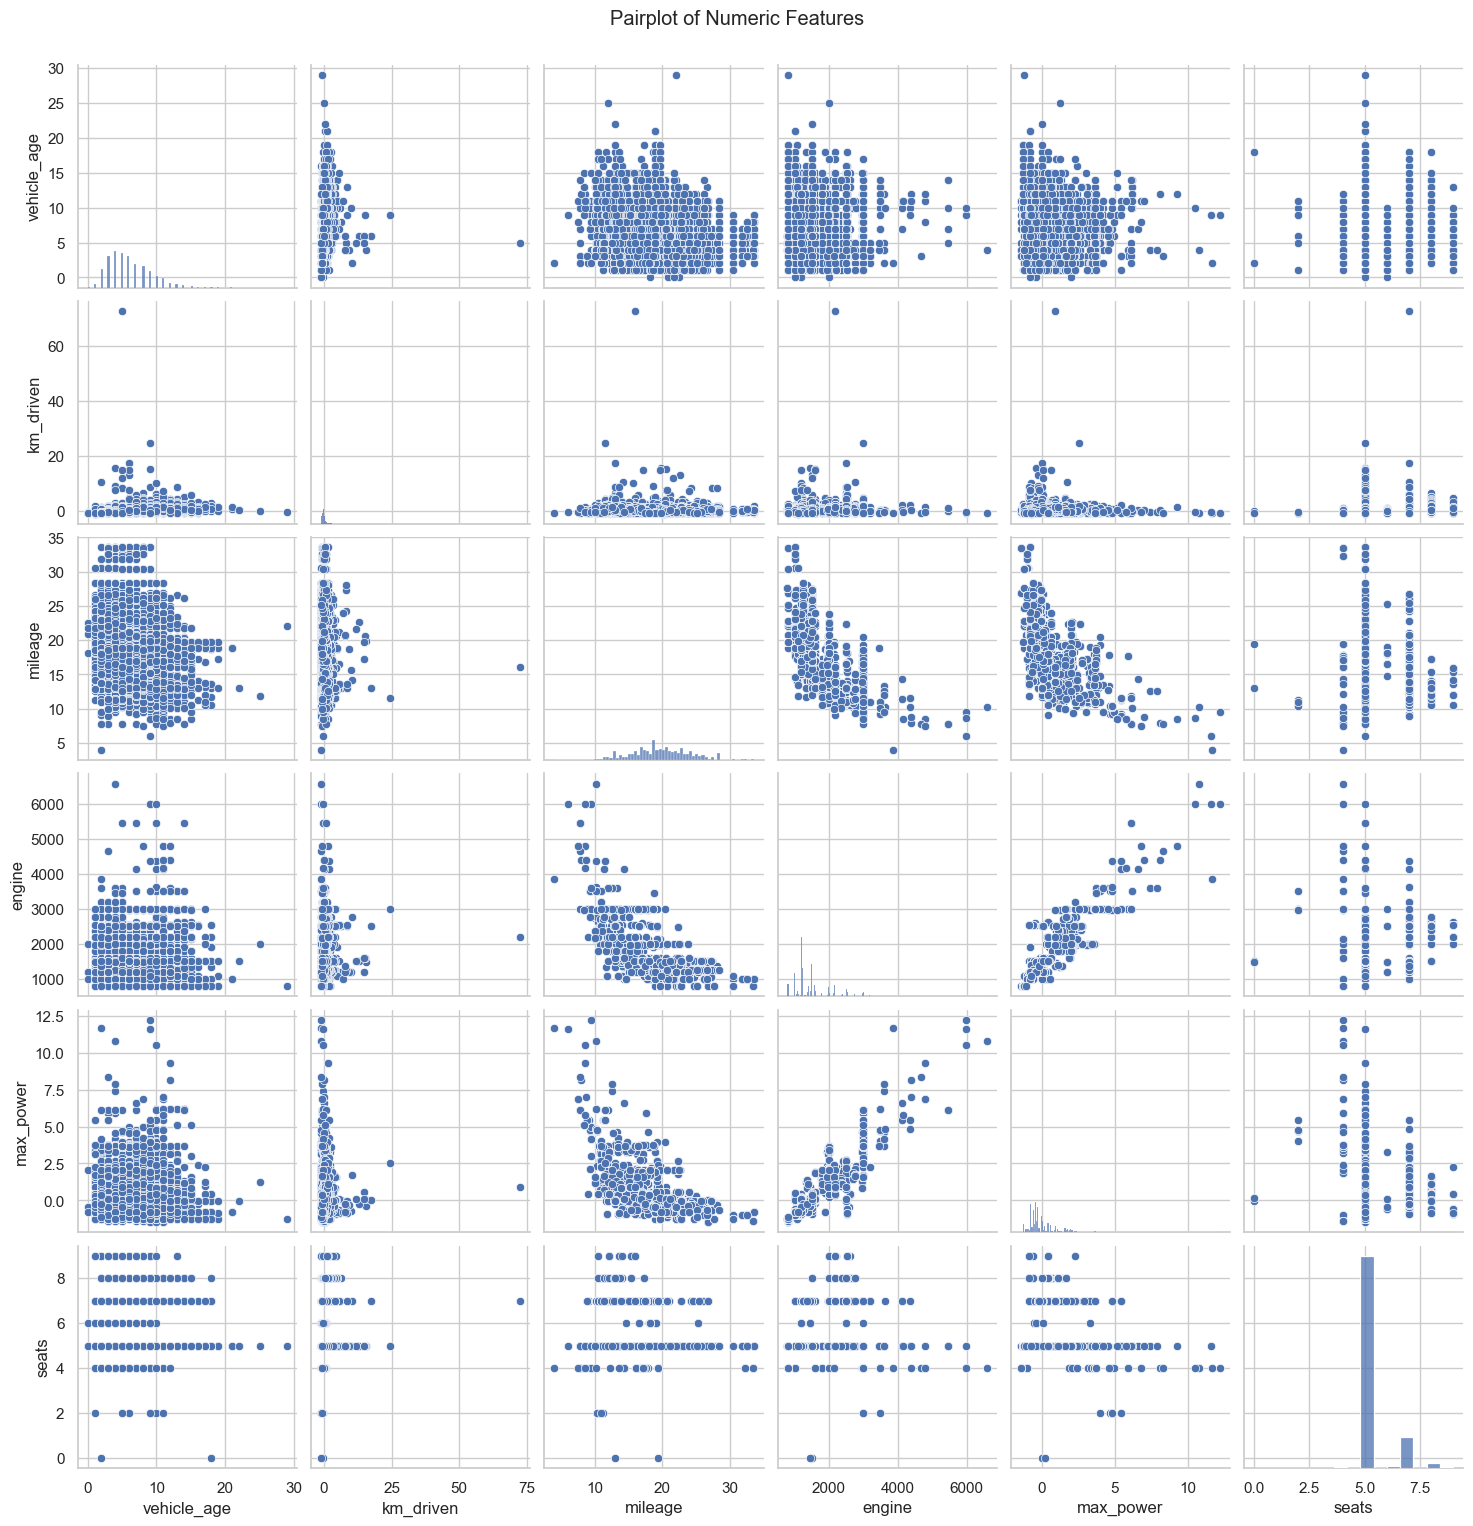

In [32]:
numeric_columns = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

sns.pairplot(df[numeric_columns], height=2.5)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()


C:\Users\antar\AppData\Local\Temp\ipykernel_23984\89041907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
C:\Users\antar\AppData\Local\Temp\ipykernel_23984\89041907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
C:\Users\antar\AppData\Local\Temp\ipykernel_23984\89041907.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')


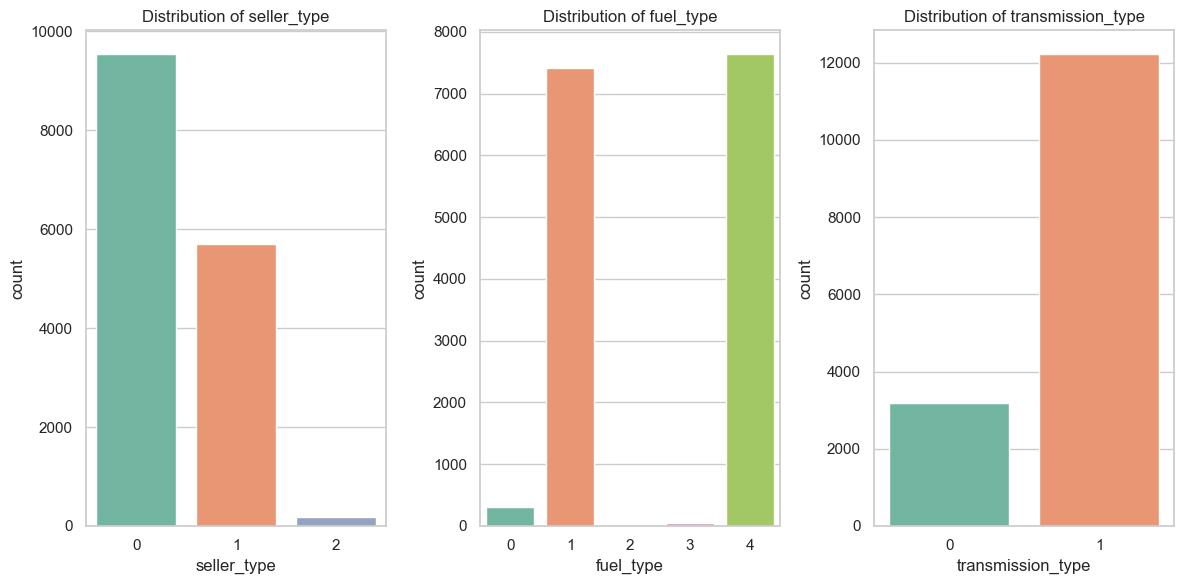

In [19]:
categorical_columns = ['seller_type', 'fuel_type', 'transmission_type']
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

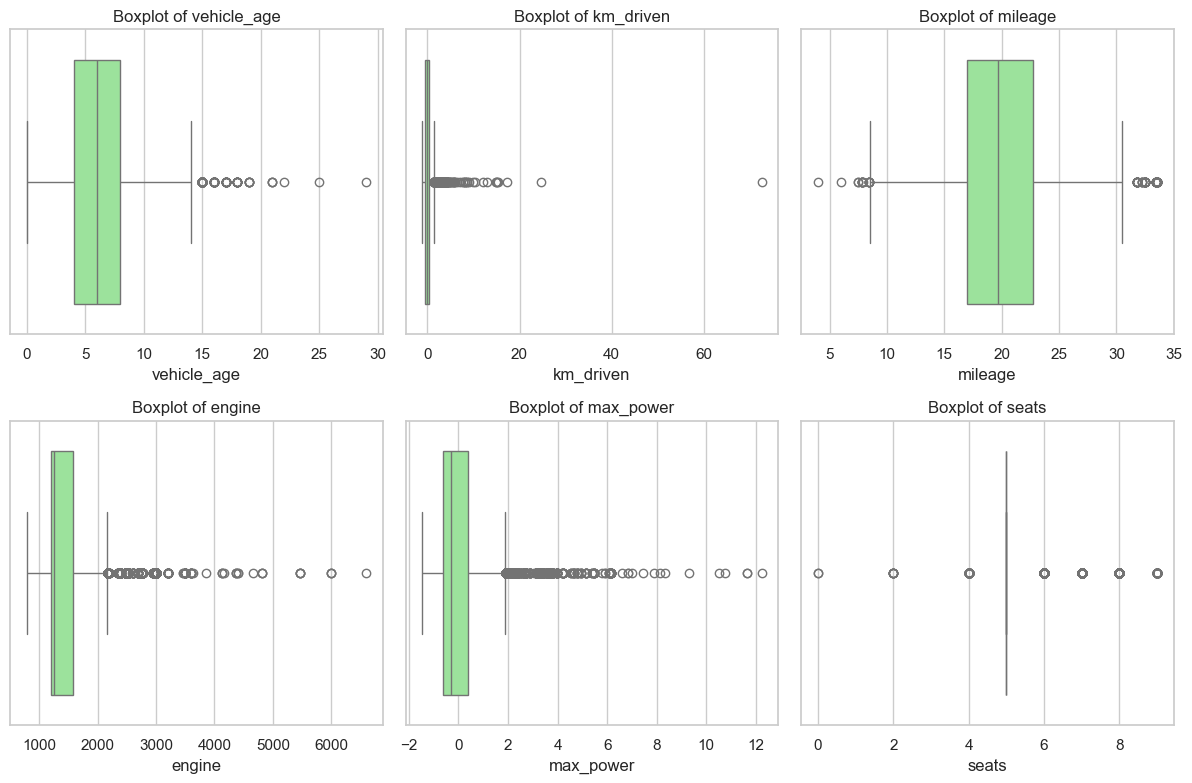

In [20]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Splitting Features and Target

In [21]:
X=df.drop('selling_price',axis=1)
Y=df['selling_price']
print(X,Y,sep='\n')

       model  vehicle_age  km_driven  seller_type  fuel_type  \
0          7            9   1.247335            1          4   
1         54            5  -0.690016            1          4   
2        118           11   0.084924            1          4   
3          7            9  -0.360667            1          4   
4         38            6  -0.496281            0          1   
...      ...          ...        ...          ...        ...   
15406    117            9  -0.869744            0          4   
15407     42            2  -0.728763            0          4   
15408     77            6   0.220539            0          1   
15409    114            5  72.541850            0          1   
15410     25            2  -0.825631            0          4   

       transmission_type  mileage  engine  max_power  seats  
0                      1    19.70     796  -1.263352      5  
1                      1    18.90    1197  -0.432571      5  
2                      1    17.00    1197  -0

### Data Splitting into Train and Test Set

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)

In [77]:
models={
    'Random Forest with hyperparameters 1': RandomForestRegressor(n_estimators=500,max_depth=15,min_samples_split=16,max_features=8),
    'Random Forest with hyperparameters 2':RandomForestRegressor(n_estimators=500,max_depth=15,min_samples_split=10,min_samples_leaf=4,max_features=8),
    'Random Forest':RandomForestRegressor(),
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'SVM':SVR(kernel='rbf',C=1,epsilon=0.1,gamma='scale'),
    'KNN':KNeighborsRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Decision Tree 1':DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_split=10, min_samples_leaf=5),
    'Decision Tree 2':DecisionTreeRegressor(max_depth=20, min_samples_split=2, min_samples_leaf=1),
    'Decision Tree 3':DecisionTreeRegressor(max_depth=15, max_features='sqrt', min_samples_split=5, min_samples_leaf=3),
    'Decision Tree 4':DecisionTreeRegressor(max_depth=8, max_features='log2', min_samples_split=5, min_samples_leaf=2),
    'Decision Tree 5':DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=1)    
    }

In [75]:
def evaluate(y_test,ypred):
    mae = round(mean_absolute_error(y_test, ypred),4)
    mse = round(mean_squared_error(y_test, ypred),4)
    rmse = round(np.sqrt(mse),4)  # Root Mean Squared Error
    r2 = round(r2_score(y_test, ypred),4)

    return {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared (R²)": r2
    }

In [76]:
results=[]
for model_name, model in models.items():
    model.fit(x_train, y_train)  # Fit the model to the training data
    y_pred = model.predict(x_test)  # Predict using the trained model
    
    # Print the model's name and its performance scores
    metrics = evaluate(y_test, y_pred)
    
    # Add model name and metrics to results list
    results.append({
        "Model": model_name,
        **metrics  # Add metrics to the dictionary
    })
results = pd.DataFrame(results)

# Print the results table
results

,Model,MAE,MSE,RMSE,R-squared (R²)
0,Random Forest with hyperparameters 1,103109.0480,5.017808e+10,224004.6520,0.9178
1,Random Forest with hyperparameters 2,102801.8123,4.980446e+10,223169.1398,0.9184
2,Random Forest,100979.1490,4.553036e+10,213378.4333,0.9254
3,LinearRegression,272201.3711,2.071479e+11,455134.9902,0.6607
4,Lasso,272201.1392,2.071477e+11,455134.8428,0.6607
5,Ridge,272182.3154,2.071330e+11,455118.6509,0.6608
6,SVM,393420.4385,6.566625e+11,810347.1178,-0.0754
7,KNN,112500.0811,9.662905e+10,310852.1349,0.8417
8,Decision Tree,123070.6189,7.260026e+10,269444.3469,0.8811
9,Decision Tree 1,193861.1634,1.293270e+11,359620.6845,0.7882


In [26]:
def print_scores(y_test,ypred):
    mae = round(mean_absolute_error(y_test, ypred),4)
    mse = round(mean_squared_error(y_test, ypred),4)
    rmse = round(np.sqrt(mse),4)  # Root Mean Squared Error
    r2 = round(r2_score(y_test, ypred),4)

    return pd.Series({
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R-squared (R²)": r2
    })

MLR

In [27]:
#Splitting Train Test Data for the Scaled data
xtrain,xtest,ytrain,ytest=train_test_split(data.drop('selling_price',axis=1),data['selling_price'],test_size=0.3)

def lin_reg(x,Y):
    X = np.insert(x, 0, 1, axis=1)
    Bcap=np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(Y))
    return Bcap

def predict(x,Bcap):
    X = np.insert(x, 0, 1, axis=1)
    return X.dot(Bcap)

ypred=predict(xtest,lin_reg(xtrain,ytrain))
print_scores(ytest,ypred)

MAE               2.728801e+05
MSE               5.053209e+11
RMSE              7.108592e+05
R-squared (R²)    5.517000e-01
dtype: float64

Random Forest from Scratch

In [71]:
def random_forest_regressor(X, y, n_trees=100, max_features='sqrt', min_samples_split=2):
    n_samples, n_features = X.shape
    trees = []

    for _ in range(n_trees):
        # Bootstrap sampling (random sampling with replacement)
        bootstrap_indices = np.random.choice(n_samples, size=n_samples, replace=True)
        X_bootstrap = X.iloc[bootstrap_indices]  # Use iloc for row indexing in pandas
        y_bootstrap = y.iloc[bootstrap_indices]  # Use iloc for row indexing in pandas

        # Select random features to use for splitting
        if max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        elif max_features == 'log2':
            max_features = int(np.log2(n_features))
        else:
            max_features = n_features

        selected_features = np.random.choice(n_features, max_features, replace=False)

        # Train a decision tree on the bootstrap sample and selected features
        tree = DecisionTreeRegressor(min_samples_split=min_samples_split)
        tree.fit(X_bootstrap.iloc[:, selected_features], y_bootstrap)  # Use iloc for column indexing
        trees.append((tree, selected_features))

    return trees

def predict_random_forest(trees, X):
    # Create a matrix to store the predictions of each tree
    tree_predictions = np.zeros((len(trees), X.shape[0]))

    # Iterate through each tree and get its predictions
    for i, (tree, selected_features) in enumerate(trees):
        tree_predictions[i] = tree.predict(X.iloc[:, selected_features])  # Use iloc for column indexing

    # Return the mean of the predictions from all trees
    return np.mean(tree_predictions, axis=0)

In [73]:
trees = random_forest_regressor(x_train, y_train, n_trees=5, max_features='sqrt', min_samples_split=2)

ypred = predict_random_forest(trees,x_test)

print_scores(y_test,ypred)

MAE               1.145217e+05
MSE               6.433622e+10
RMSE              2.536459e+05
R-squared (R²)    8.946000e-01
dtype: float64

In [41]:
print_scores(y_test,models['SVM'].fit(x_train,y_train).predict(x_test))

MAE               4.122005e+05
MSE               7.990290e+11
RMSE              8.938842e+05
R-squared (R²)   -6.650000e-02
dtype: float64